In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [27]:
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass

In [28]:
df['time'] = pd.to_datetime(df['time'])

In [29]:
df = df.sort_values(by='time')

In [30]:
df['ones'] = 1

In [31]:
df.set_index('time', inplace=True)

Text(0, 0.5, 'cumulative number of events')

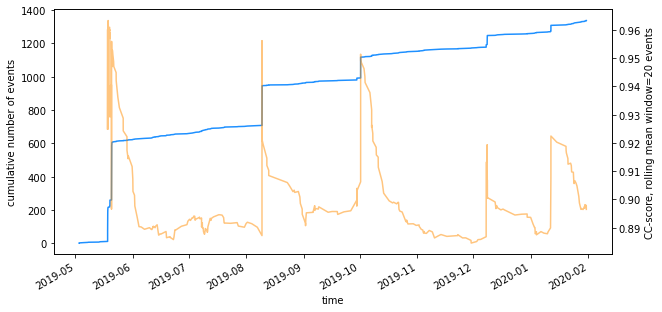

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')

<AxesSubplot:xlabel='time'>

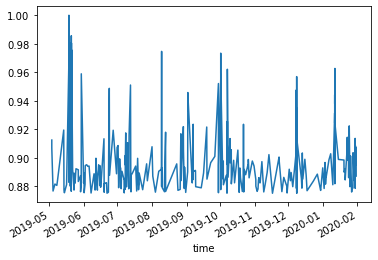

In [36]:
df.similarity.plot()

In [68]:
days_count = df.groupby(pd.Grouper(freq='1D')).sum()
days_count[days_count.ones > 2]

,similarity,template_id,ones
time,,,
2019-05-18 00:00:00+00:00,196.475488,0,207
2019-05-19 00:00:00+00:00,39.556439,0,42
2019-05-20 00:00:00+00:00,326.496506,0,348
2019-05-21 00:00:00+00:00,2.747345,0,3
2019-05-23 00:00:00+00:00,2.655458,0,3
2019-06-01 00:00:00+00:00,2.646086,0,3
2019-06-11 00:00:00+00:00,3.568960,0,4
2019-06-15 00:00:00+00:00,2.654263,0,3
2019-06-19 00:00:00+00:00,2.639354,0,3
